In [1]:
import os
import sys

# Add the project root to sys.path
cwd = os.getcwd()
project_root = os.path.dirname(cwd)
sys.path.append(project_root)

from scripts.data_analysis_utils import DataAnalysis

In [2]:
# define the data path
data_path = '../data/sierraleone-bumbuna.csv'

In [3]:
# Create an instance of the DataAnalysis class
data_analyzer = DataAnalysis(data_path)

In [4]:
# Load the data
data_analyzer.load_data()

Dataset loaded successfully!


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-29 23:56,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525596,2022-10-29 23:57,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525597,2022-10-29 23:58,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN
525598,2022-10-29 23:59,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN


In [5]:
# Get summary statistics
summary_stats = data_analyzer.summary_statistics()
print(summary_stats)

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.000000      23.1000

In [6]:
# Perform data quality check
data_quality_results = data_analyzer.data_quality_check(['GHI', 'DNI', 'DHI'])
print(data_quality_results)

{'GHI': {'missing_values': 0, 'negative_values': 261135, 'outliers': 2477}, 'DNI': {'missing_values': 0, 'negative_values': 266352, 'outliers': 7586}, 'DHI': {'missing_values': 0, 'negative_values': 263128, 'outliers': 2986}}


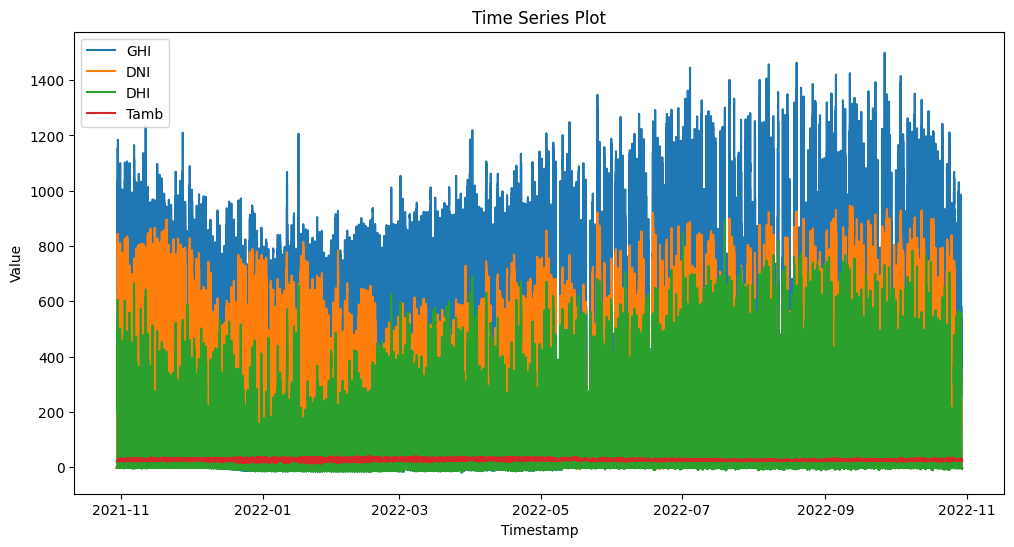

In [7]:
# Time series analysis for temperature and irradiance columns
data_analyzer.time_series_analysis(['GHI', 'DNI', 'DHI', 'Tamb'])

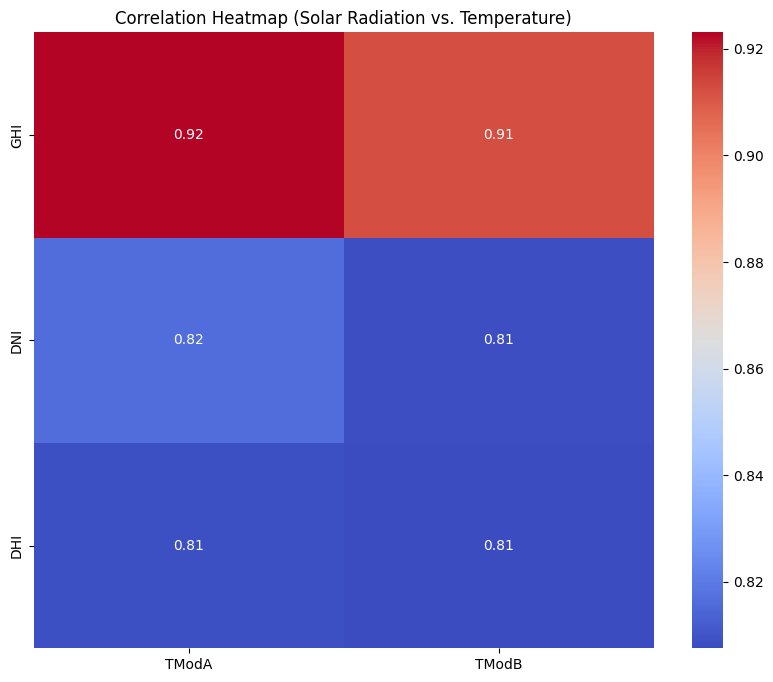

In [8]:
# Perform correlation analysis
data_analyzer.correlation_analysis("Solar Radiation", ['GHI', 'DNI', 'DHI'], "Temperature", ['TModA', 'TModB'])


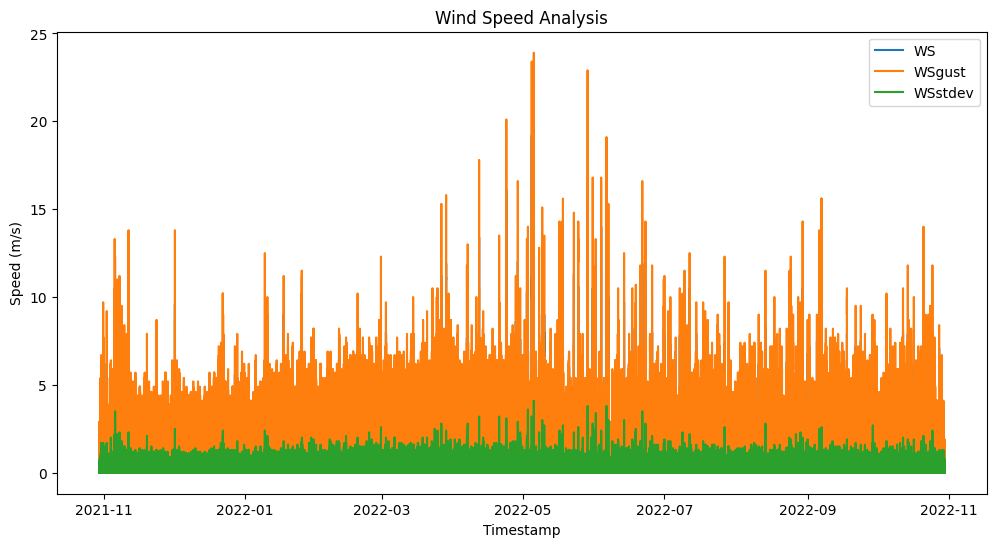

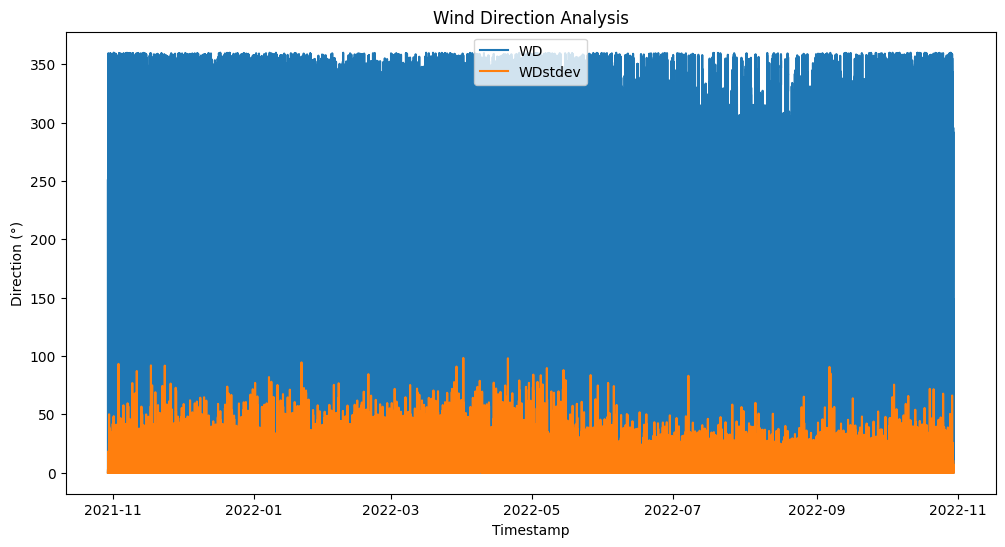

In [9]:
# Wind analysis
wind_speed_cols = ['WS', 'WSgust', 'WSstdev']
wind_direction_cols = ['WD', 'WDstdev']
data_analyzer.wind_analysis(wind_speed_cols, wind_direction_cols)

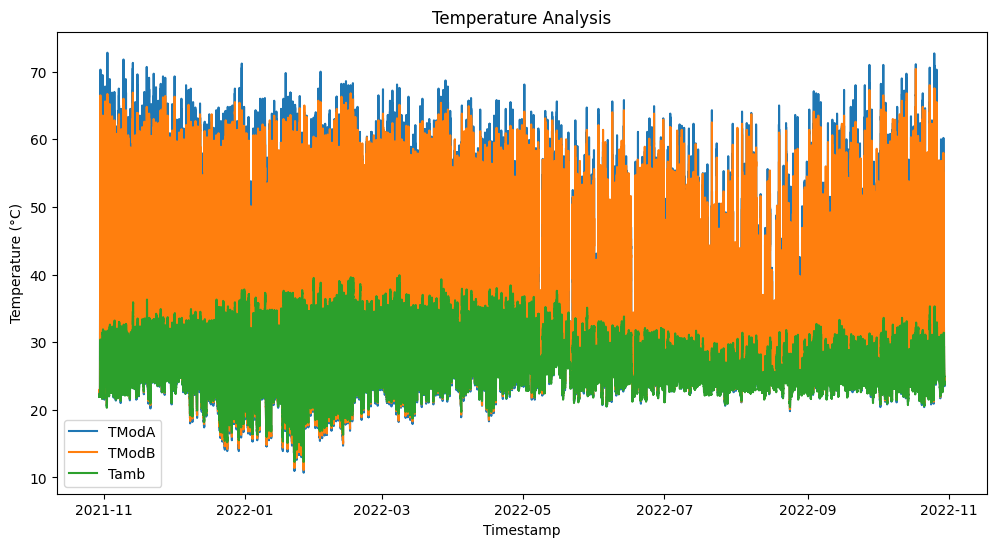

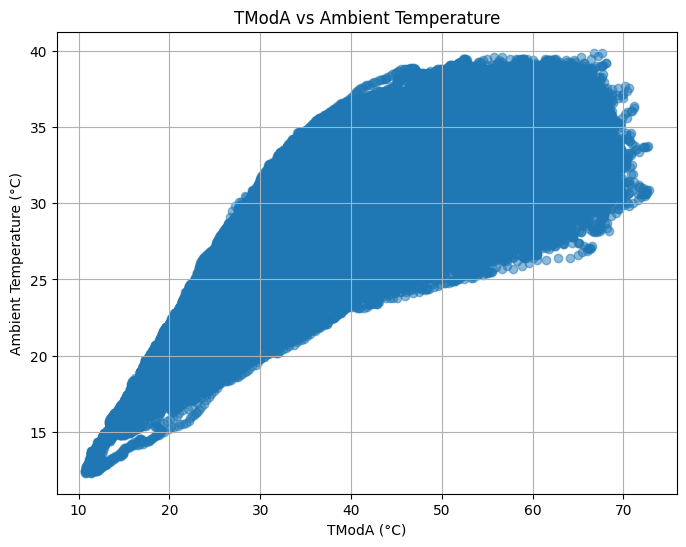

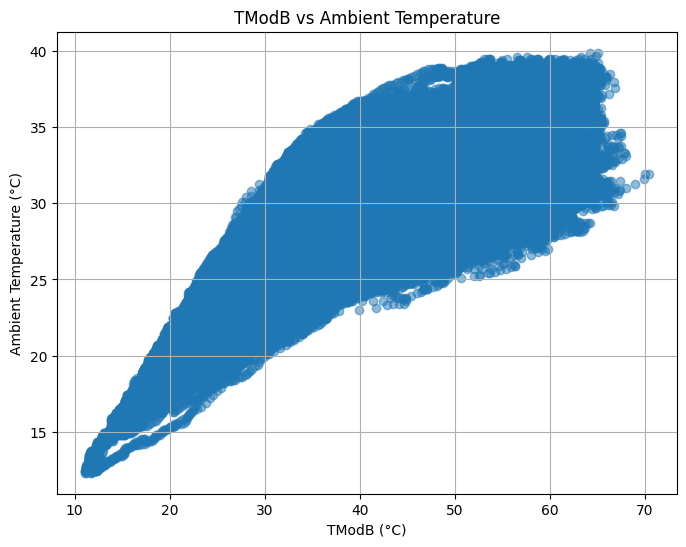

In [10]:
# Temperature analysis for module and ambient temperature columns
temperature_cols = ['TModA', 'TModB', 'Tamb']
data_analyzer.temperature_analysis(temperature_cols)

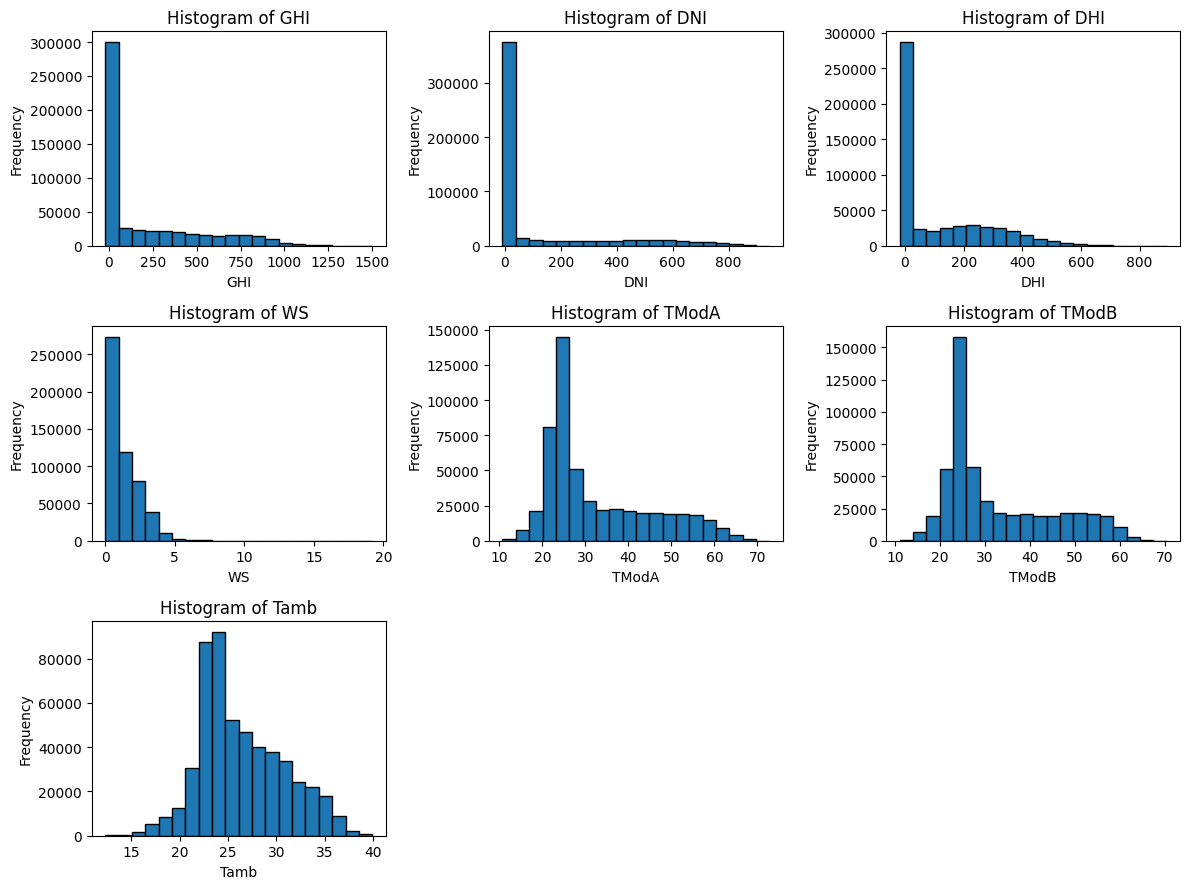

In [11]:
# Create histograms for GHI, DNI, DHI, TModA, WS
data_analyzer.histograms(['GHI', 'DNI', 'DHI', 'WS', 'TModA', 'TModB', 'Tamb'])

Box Plots for Solar Radiation:


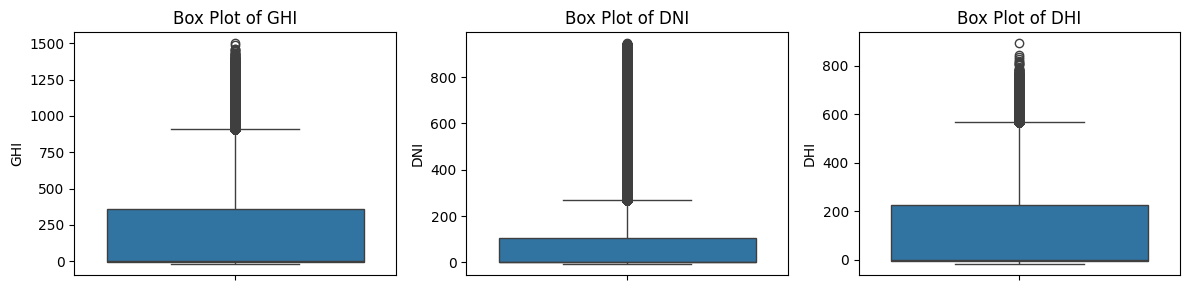

Box Plots for Temperature:


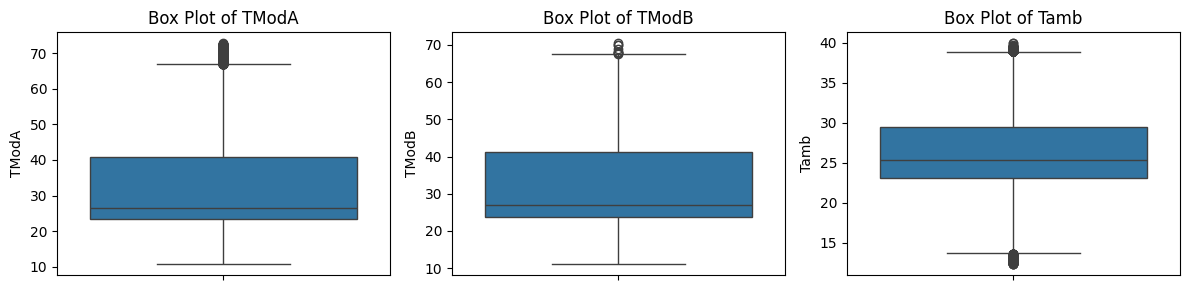

In [12]:
# Define lists containing solar radiation and temperature columns
solar_radiation_cols = ['GHI', 'DNI', 'DHI']
temperature_cols = ['TModA', 'TModB', 'Tamb']

# Create box plots for solar radiation data
print("Box Plots for Solar Radiation:")
data_analyzer.box_plots(solar_radiation_cols)

# Create box plots for temperature data
print("Box Plots for Temperature:")
data_analyzer.box_plots(temperature_cols)

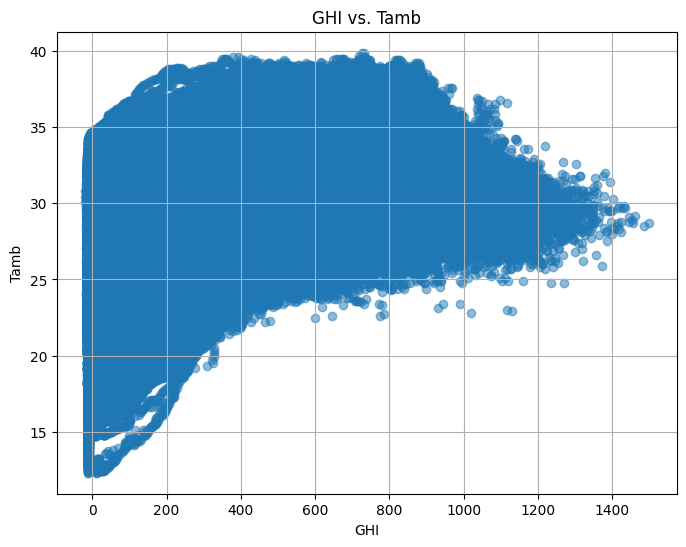

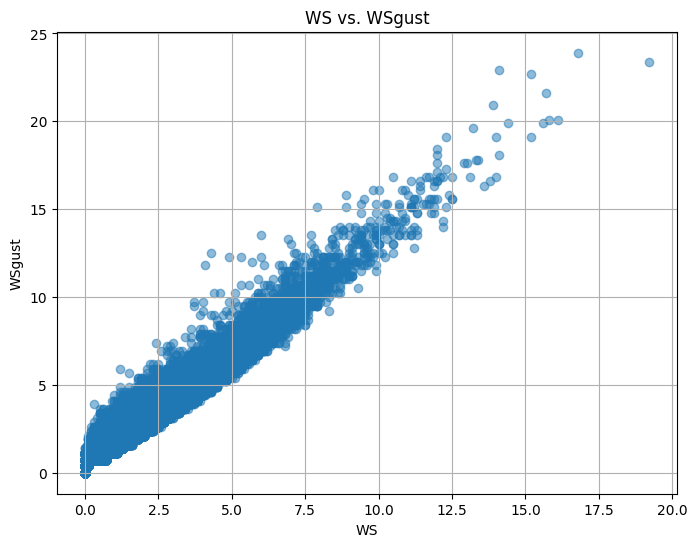

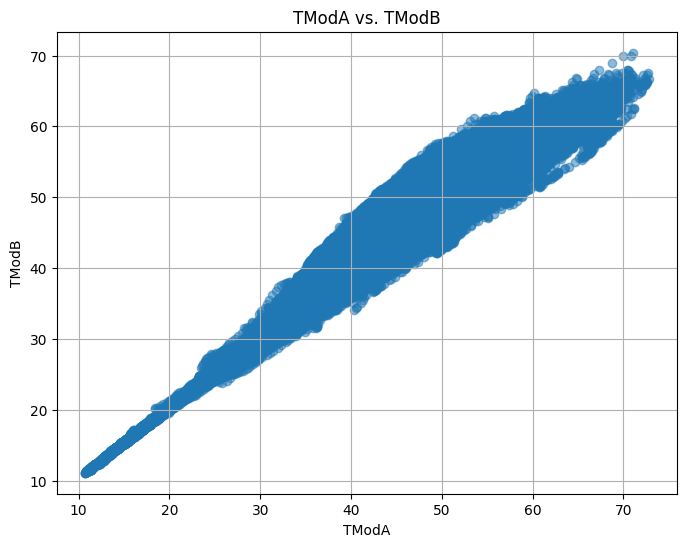

In [13]:
# Scatter plots (
scatter_plot_pairs = [
    ('GHI', 'Tamb'),  # GHI vs. Ambient Temperature
    ('WS', 'WSgust'),   # Wind Speed vs. Wind Gust
    ('TModA', 'TModB'),  # Module Temperature A vs. Module Temperature B
]

# Create scatter plots for each pair of variables
for x_col, y_col in scatter_plot_pairs:
    data_analyzer.scatter_plot(x_col, y_col)

In [14]:
# Data Cleaning
cleaned_data = data_analyzer.data_cleaning(drop_comments=True, handle_missing_values='dropna', columns_to_clean=['GHI', 'DNI', 'DHI'])
print(cleaned_data)

                 Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb     RH   WS  \
0      2021-10-30 00:01:00  0.7  0.1  0.8   0.0   0.0  21.9   99.1  0.0   
1      2021-10-30 00:02:00  0.7  0.1  0.8   0.0   0.0  21.9   99.2  0.0   
2      2021-10-30 00:03:00  0.7  0.1  0.8   0.0   0.0  21.9   99.2  0.0   
3      2021-10-30 00:04:00  0.7  0.0  0.8   0.0   0.0  21.9   99.3  0.0   
4      2021-10-30 00:05:00  0.7  0.1  0.8   0.0   0.0  21.9   99.3  0.0   
...                    ...  ...  ...  ...   ...   ...   ...    ...  ...   
525595 2022-10-29 23:56:00  1.6  0.1  2.9   0.0   0.0  24.0  100.0  0.0   
525596 2022-10-29 23:57:00  1.7  0.1  3.0   0.0   0.0  24.0  100.0  0.0   
525597 2022-10-29 23:58:00  1.7  0.1  3.1   0.0   0.0  24.0  100.0  0.0   
525598 2022-10-29 23:59:00  1.7  0.2  3.3   0.0   0.0  23.9  100.0  0.0   
525599 2022-10-30 00:00:00  1.7  0.1  3.4   0.0   0.0  23.9  100.0  0.0   

        WSgust  WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  \
0          0.0      

In [15]:
# Get summary statistics after data cleaning
summary_stats = data_analyzer.summary_statistics(cleaned_data)
print(summary_stats)

                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-04-30 12:00:30.000000768     206.856041     116.671125   
min              2021-10-30 00:01:00       0.000000       0.000000   
25%              2022-01-29 06:00:45       2.400000       0.200000   
50%              2022-04-30 12:00:30      11.900000       0.400000   
75%              2022-07-30 18:00:15     362.400000     107.000000   
max              2022-10-30 00:00:00    1499.000000     946.000000   
std                              NaN     295.121615     218.495504   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      118.826784     206.643095     198.114691      26.319394   
min         0.000000       0.000000       0.000000      12.300000   
25%         3.400000       0.000000       0.000000      23.100000   
50%        11.900000    

In [16]:
# Perform data quality check on cleaned data
data_quality_results = data_analyzer.data_quality_check(['GHI', 'DNI', 'DHI'], cleaned_data)
print(data_quality_results)

{'GHI': {'missing_values': 0, 'negative_values': 0, 'outliers': 2638}, 'DNI': {'missing_values': 0, 'negative_values': 0, 'outliers': 7602}, 'DHI': {'missing_values': 0, 'negative_values': 0, 'outliers': 3381}}


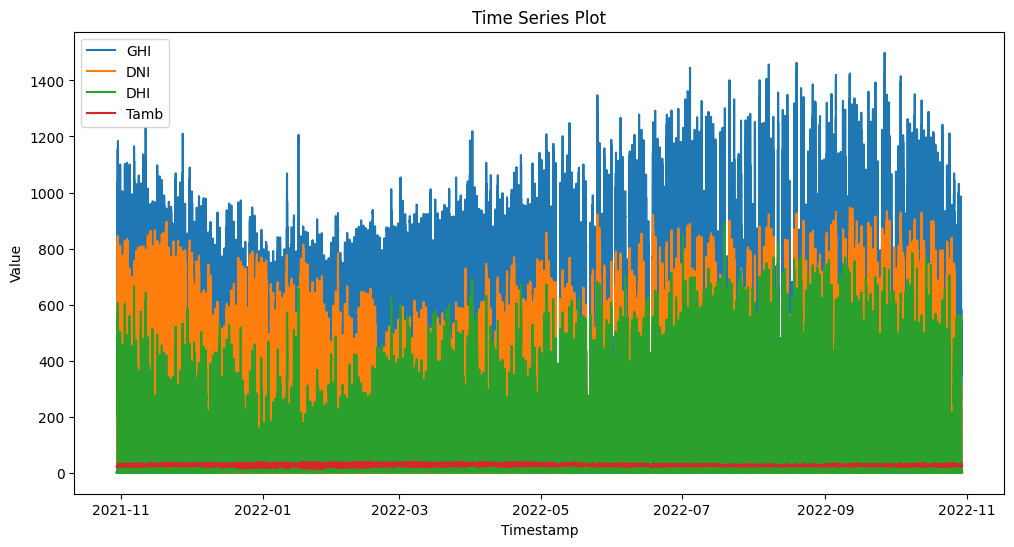

In [17]:
# Time series analysis for temperature and irradiance columns using cleaned data
data_analyzer.time_series_analysis(['GHI', 'DNI', 'DHI', 'Tamb'], cleaned_data)

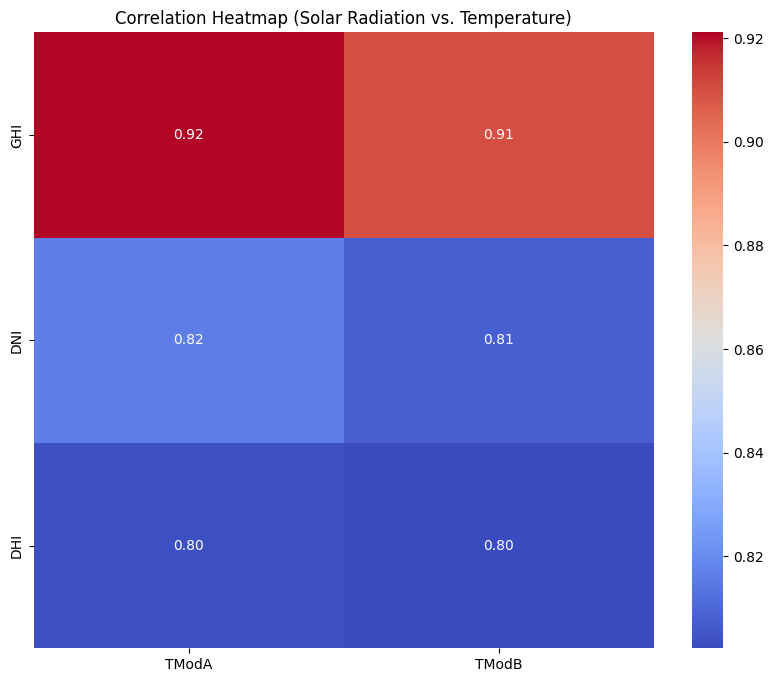

In [18]:
# Perform correlation analysis using cleaned data
data_analyzer.correlation_analysis("Solar Radiation", ['GHI', 'DNI', 'DHI'], "Temperature", ['TModA', 'TModB'], cleaned_data)

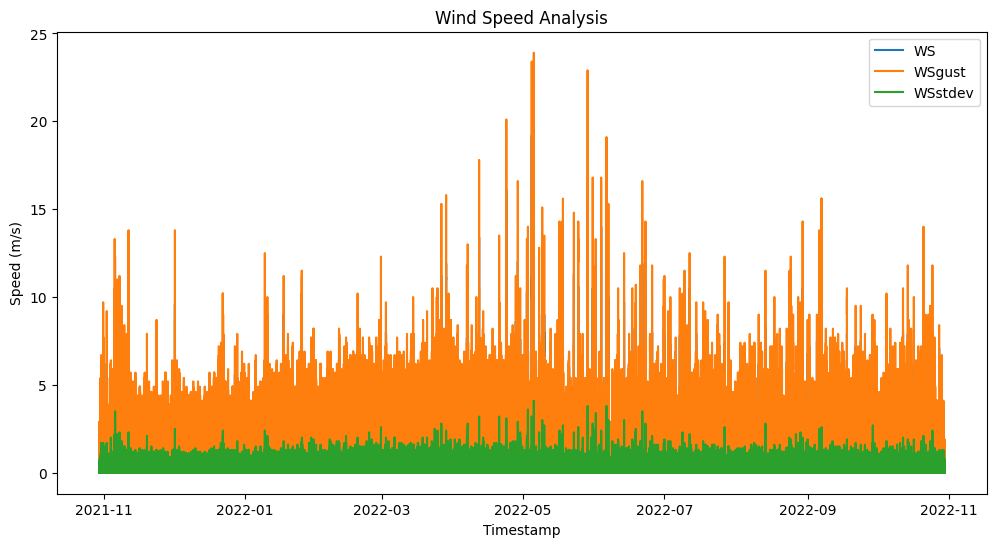

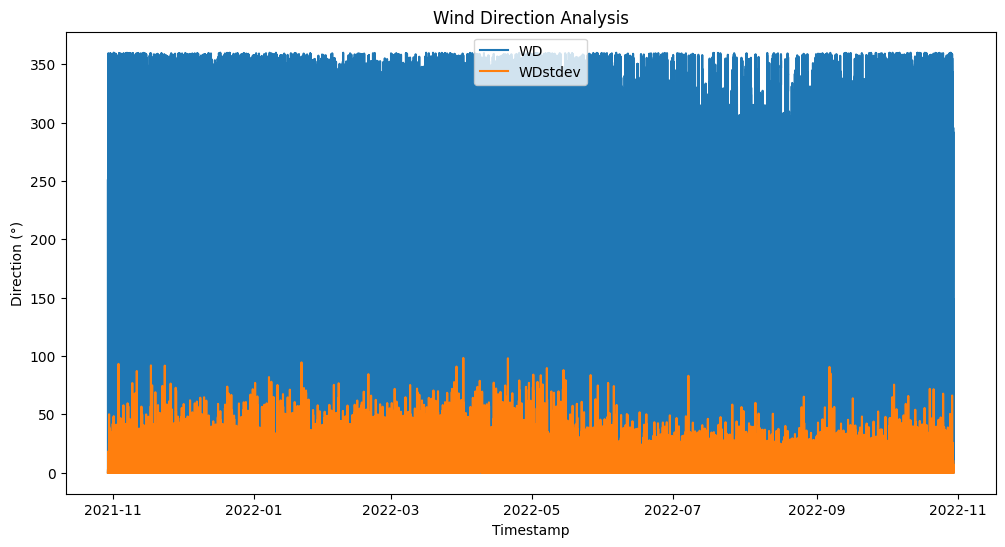

In [19]:
# Wind analysis using cleaned data
data_analyzer.wind_analysis(wind_speed_cols, wind_direction_cols, cleaned_data)

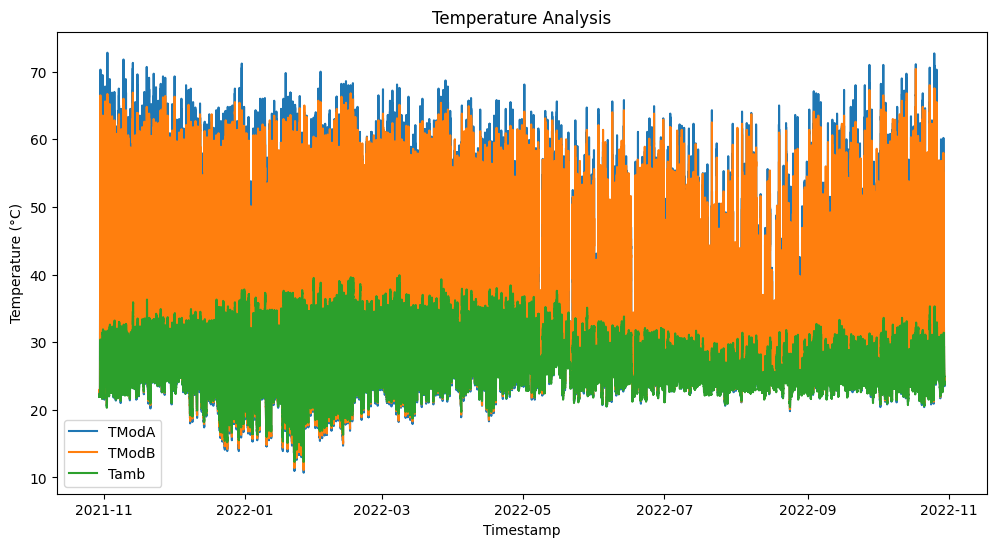

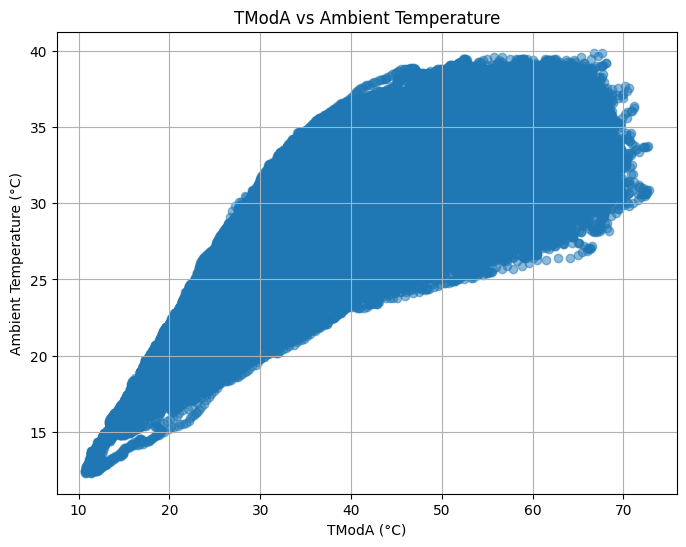

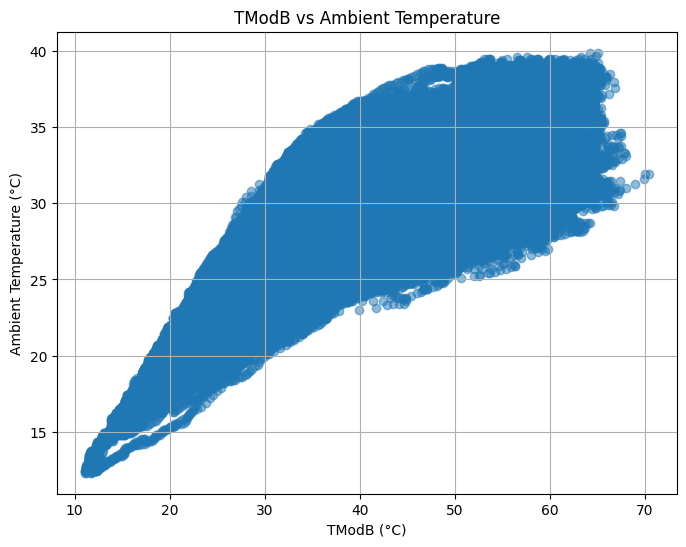

In [20]:
# Temperature analysis for module and ambient temperature columns using cleaned data
data_analyzer.temperature_analysis(temperature_cols, data=cleaned_data) 

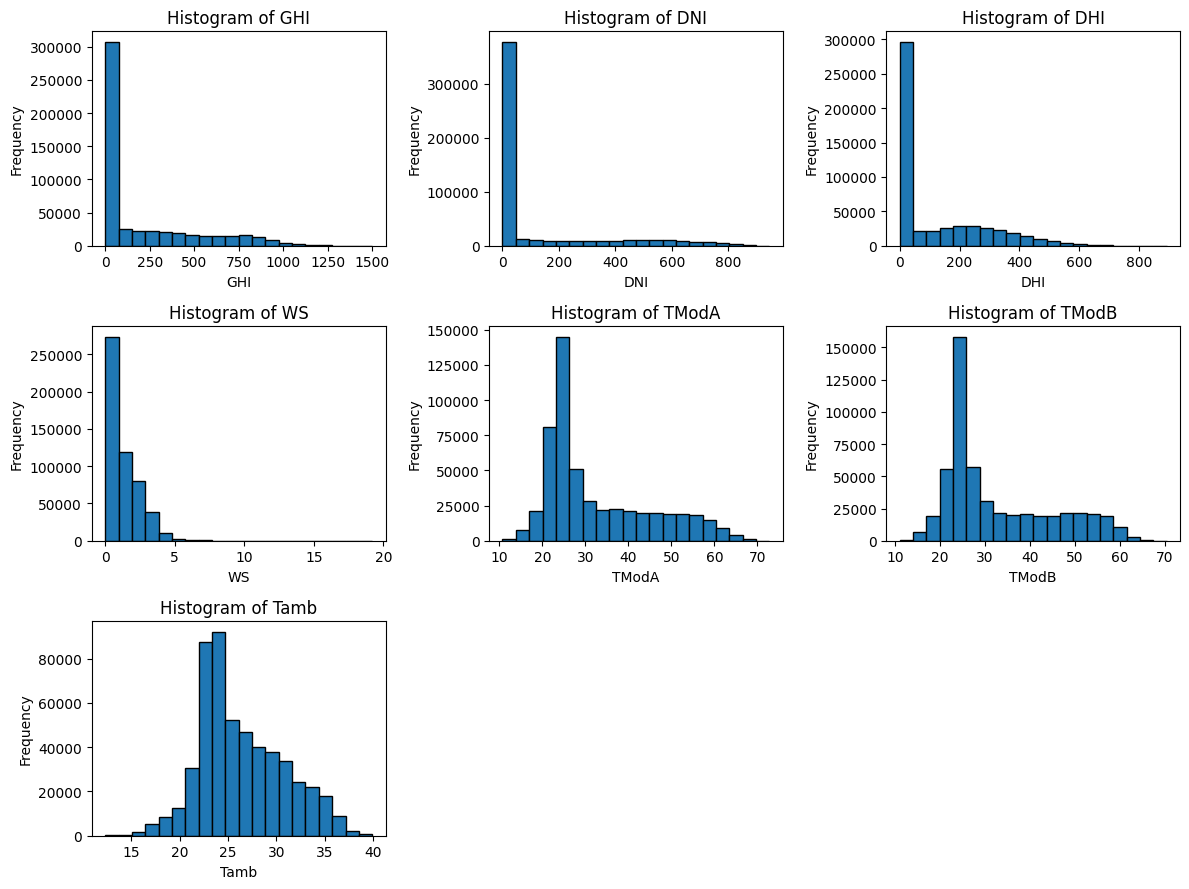

In [21]:
# Create histograms for GHI, DNI, DHI, TModA, WS with cleaned data
data_analyzer.histograms(['GHI', 'DNI', 'DHI', 'WS', 'TModA', 'TModB', 'Tamb'], cleaned_data)

Box Plots for Solar Radiation:


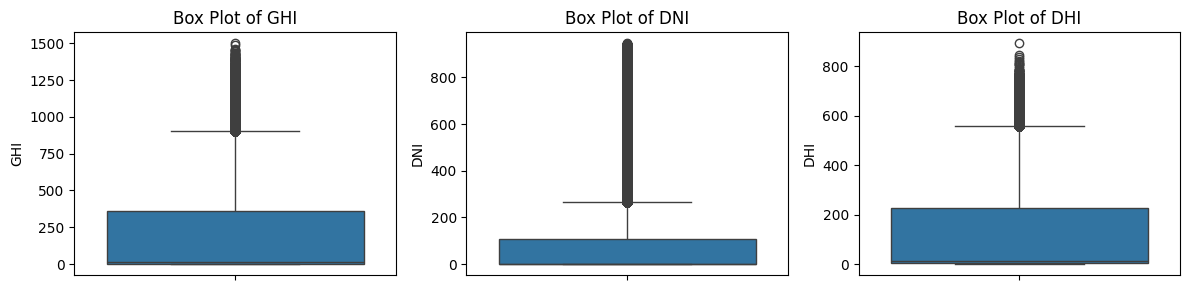

Box Plots for Temperature:


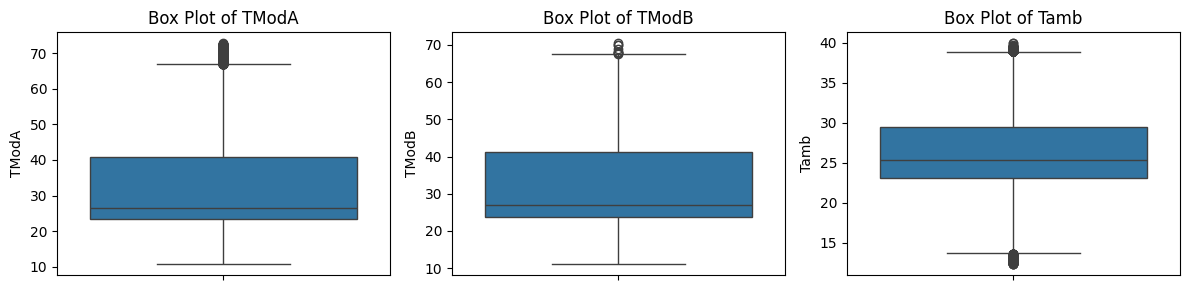

In [22]:
#Box Plots using cleaned data
# Define lists containing solar radiation and temperature columns

# Create box plots for solar radiation data
print("Box Plots for Solar Radiation:")
data_analyzer.box_plots(solar_radiation_cols, cleaned_data)

# Create box plots for temperature data
print("Box Plots for Temperature:")
data_analyzer.box_plots(temperature_cols, cleaned_data)

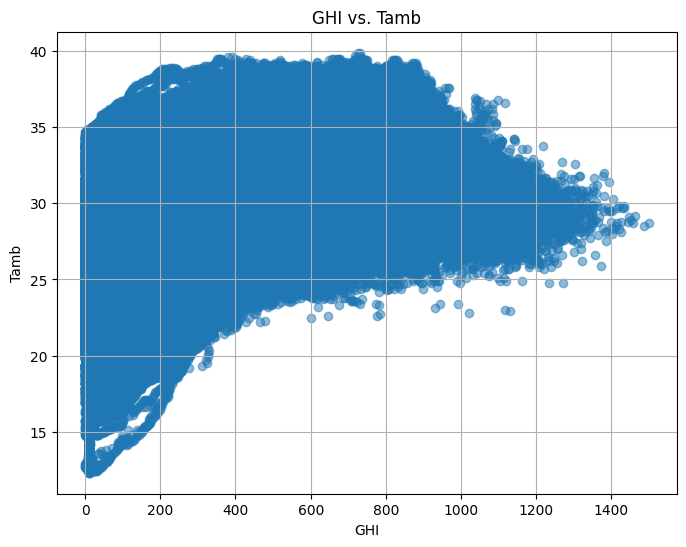

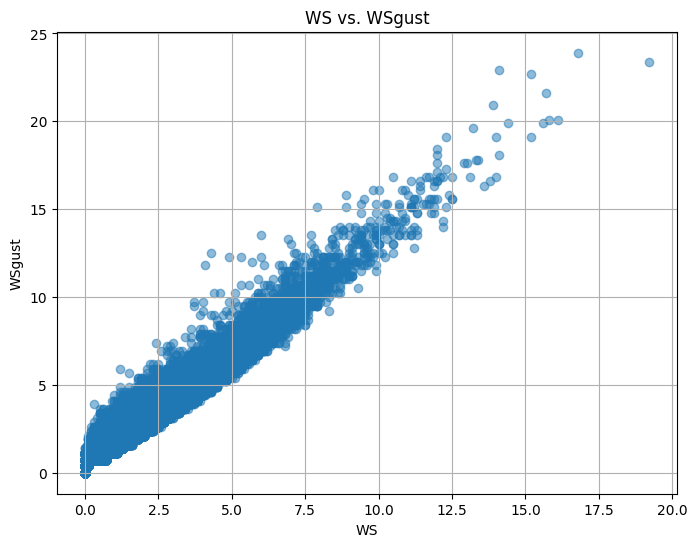

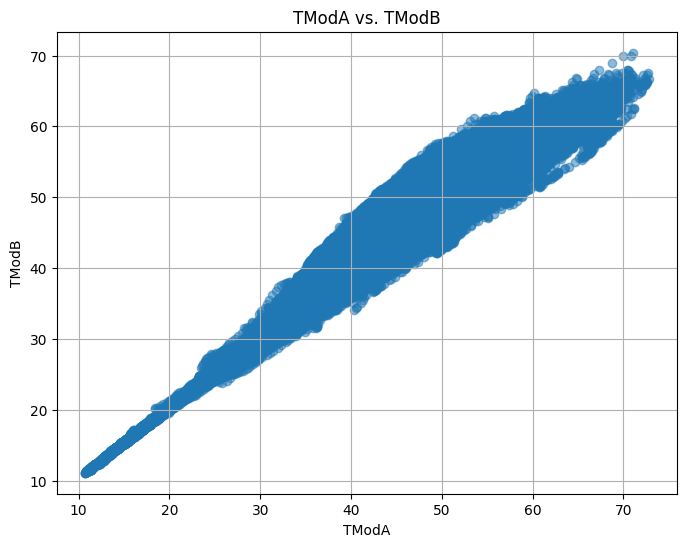

In [23]:
# Scatter plots with the cleaned data

# Create scatter plots for each pair of variables
for x_col, y_col in scatter_plot_pairs:
    data_analyzer.scatter_plot(x_col, y_col, cleaned_data)